<a href="https://colab.research.google.com/github/Adarsh0027/BA01/blob/main/16_02_23(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data=files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
df=pd.read_csv("titanic.csv")

In [3]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Survived
0,1,3,1,34.5,1,0,0
1,2,1,0,47.0,1,0,1
2,3,3,0,62.0,0,0,1
3,4,1,0,27.0,1,0,1
4,5,3,1,22.0,0,0,0


In [4]:
x=df.drop("Survived",1)
y=df.Survived


<ipython-input-4-8e7d975773ce>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x=df.drop("Survived",1)


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=8)

In [6]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
tree=tree.fit(X_train,y_train)
predictedy=tree.predict(X_test)

In [7]:
from sklearn import metrics 
accuracy=metrics.accuracy_score(y_test,predictedy)
print(accuracy*100)

69.02985074626866


In [8]:
from sklearn.tree import export_graphviz
from io import StringIO

In [9]:
dotdata=StringIO()
export_graphviz(tree,out_file=dotdata,filled=True,special_characters=True,class_names=['O','I'])
print(dotdata.getvalue())

digraph Tree {
node [shape=box, style="filled", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label=<X<SUB>2</SUB> &le; 0.5<br/>gini = 0.475<br/>samples = 623<br/>value = [381, 242]<br/>class = O>, fillcolor="#f6d1b7"] ;
1 [label=<X<SUB>1</SUB> &le; 2.5<br/>gini = 0.376<br/>samples = 227<br/>value = [57, 170]<br/>class = I>, fillcolor="#7bbeee"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<X<SUB>3</SUB> &le; 0.415<br/>gini = 0.09<br/>samples = 127<br/>value = [6, 121]<br/>class = I>, fillcolor="#43a2e6"] ;
1 -> 2 ;
3 [label=<X<SUB>0</SUB> &le; 294.5<br/>gini = 0.355<br/>samples = 13<br/>value = [3, 10]<br/>class = I>, fillcolor="#74baed"] ;
2 -> 3 ;
4 [label=<X<SUB>1</SUB> &le; 1.5<br/>gini = 0.219<br/>samples = 8<br/>value = [1, 7]<br/>class = I>, fillcolor="#55abe9"] ;
3 -> 4 ;
5 [label=<gini = 0.0<br/>samples = 4<br/>value = [0, 4]<br/>class = I>, fillcolor="#399de5"] ;
4 -> 5 ;
6 [label=<X<SUB>0</SUB> &le; 167.0<br/>gini = 0.37

In [10]:
import pydotplus as pp
graph=pp.graph_from_dot_data(dotdata.getvalue())
graph.write_png("tree_for_diabetes.png")

True

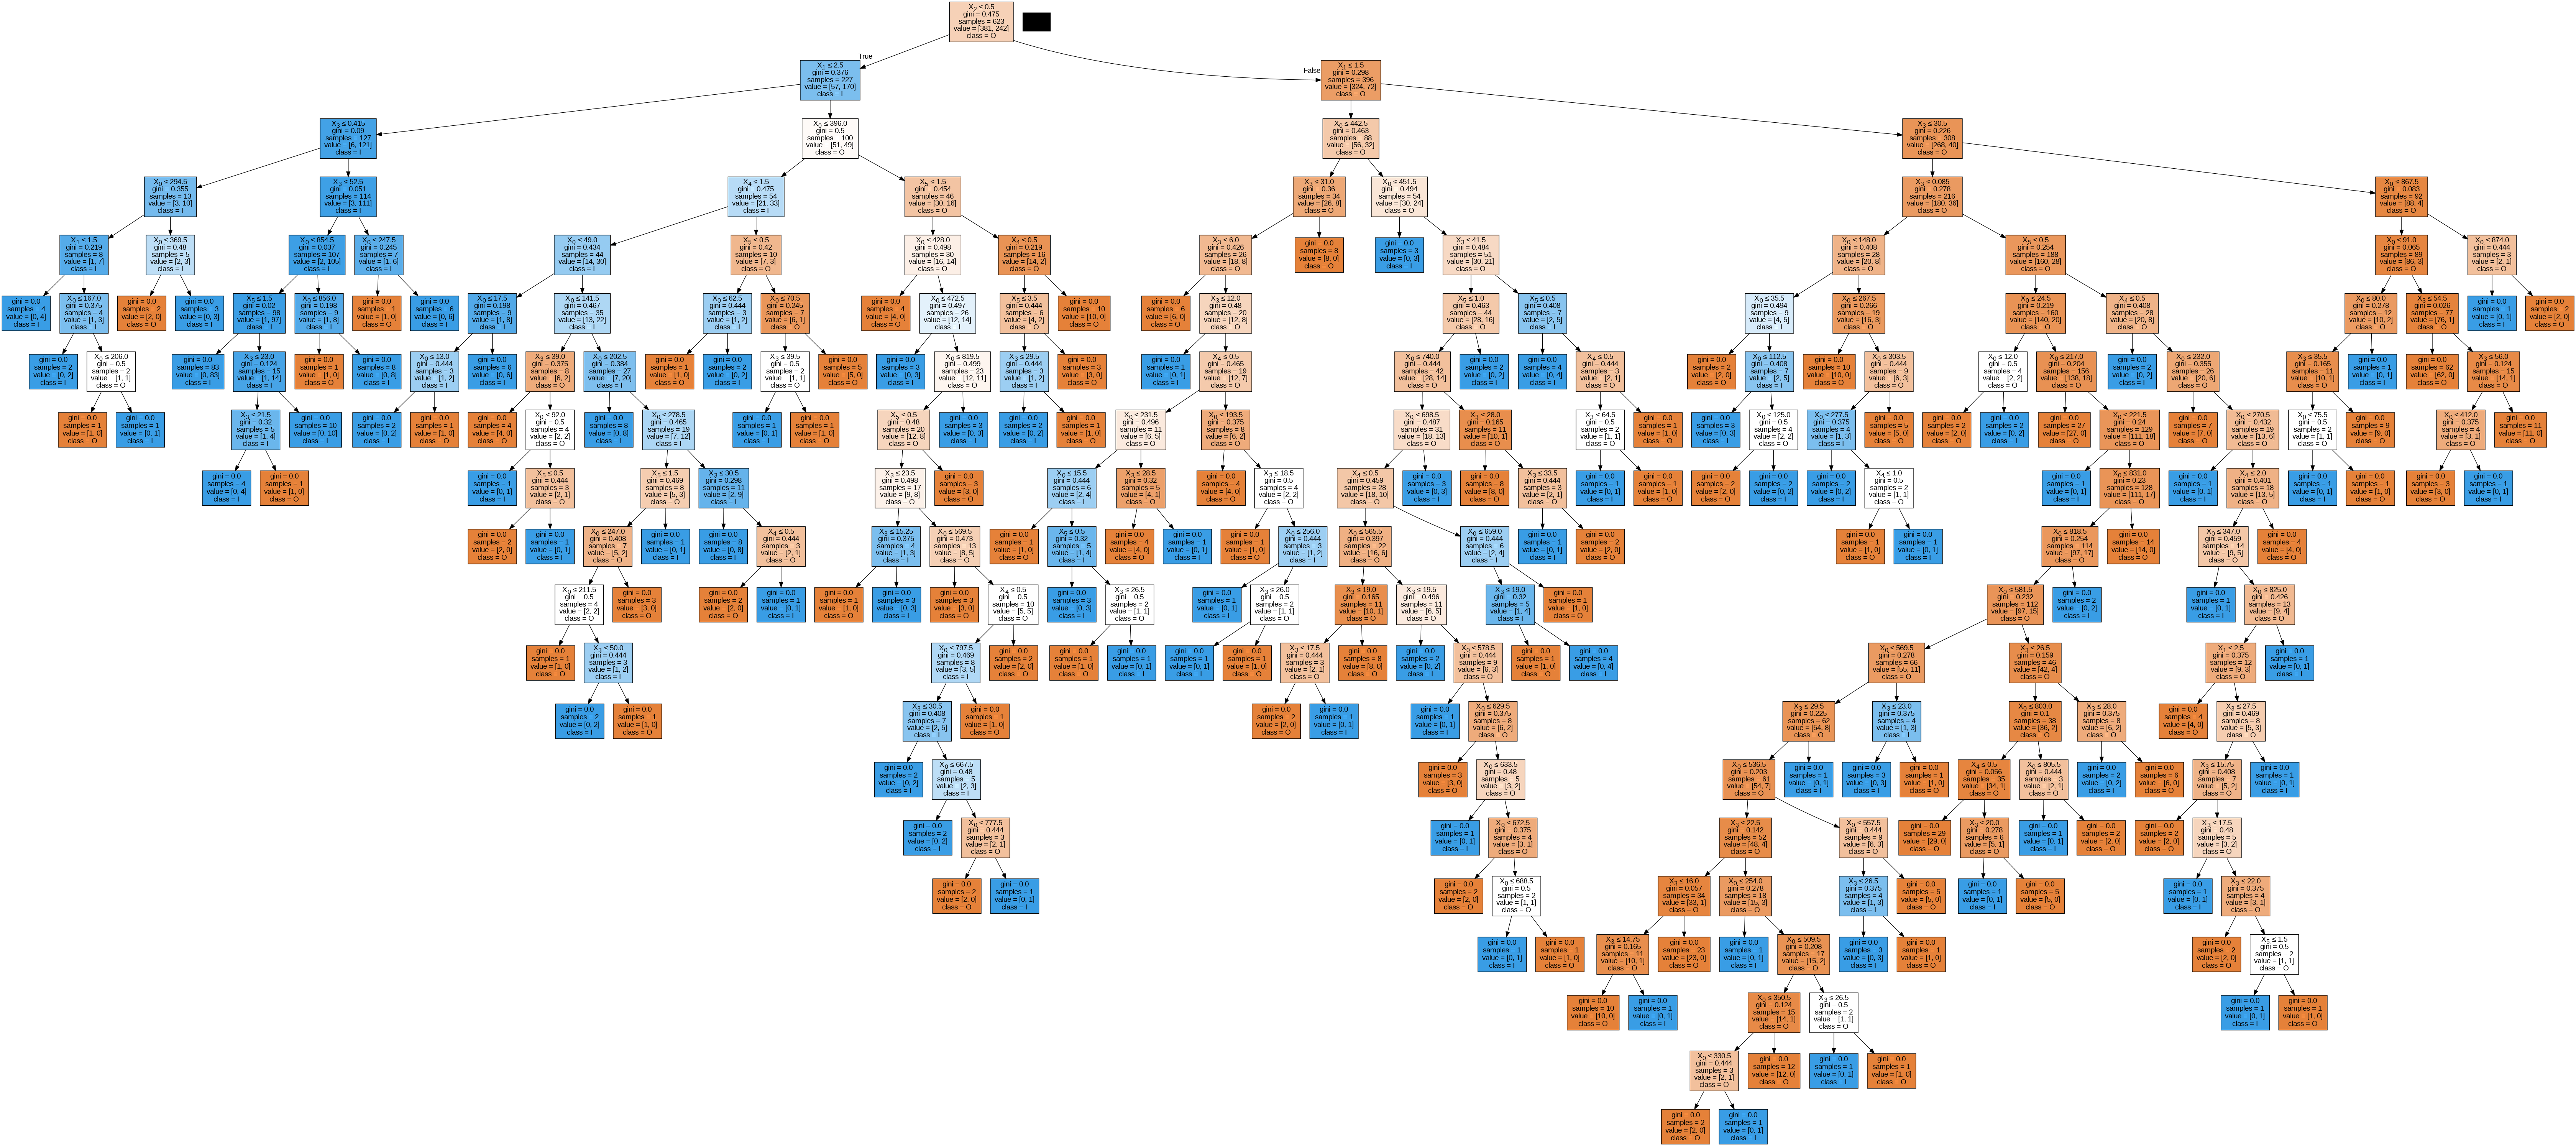

In [11]:
from IPython.display import Image
Image(graph.create_png())